In [ ]:
https://github.com/kousik1103/EDA.git

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [54]:
df = pd.read_csv("HepatitisCdata.csv")
print(df.head())


   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [55]:
df.shape

(615, 14)

In [56]:
category_mapping = {
    '0=Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3
}

# Apply the mapping to the Category column
df['Category'] = df['Category'].map(category_mapping)

In [57]:
print(df.Sex.value_counts())
df.Category.value_counts()

Sex
m    377
f    238
Name: count, dtype: int64


,count
Category,
0.0,533
3.0,30
1.0,24
2.0,21


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    608 non-null    float64
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 67.4+ KB


In [59]:
df.isnull().sum()

,0
Unnamed: 0,0
Category,7
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


In [60]:
df.dropna()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0.0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0.0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0.0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0.0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0.0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3.0,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3.0,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3.0,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3.0,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [61]:
print(df.describe())
print( df.isnull().sum())

       Unnamed: 0    Category         Age         ALB         ALP         ALT  \
count  615.000000  608.000000  615.000000  614.000000  597.000000  614.000000   
mean   308.000000    0.256579   47.408130   41.620195   68.283920   28.450814   
std    177.679487    0.746186   10.055105    5.780629   26.028315   25.469689   
min      1.000000    0.000000   19.000000   14.900000   11.300000    0.900000   
25%    154.500000    0.000000   39.000000   38.800000   52.500000   16.400000   
50%    308.000000    0.000000   47.000000   41.950000   66.200000   23.000000   
75%    461.500000    0.000000   54.000000   45.200000   80.100000   33.075000   
max    615.000000    3.000000   77.000000   82.200000  416.600000  325.300000   

              AST         BIL         CHE        CHOL         CREA  \
count  615.000000  615.000000  615.000000  605.000000   615.000000   
mean    34.786341   11.396748    8.196634    5.368099    81.287805   
std     33.090690   19.673150    2.205657    1.132728    49.

In [62]:
df.dropna(inplace=True)
df.shape

(582, 14)

In [63]:
print("Mean of ALT", df['ALT'].mean())
print("Median of ALT", df['ALT'].median())
print("Mode of ALT", df['ALT'].mode())

Mean of ALT 25.666838487972505
Median of ALT 22.5
Mode of ALT 0    16.6
Name: ALT, dtype: float64


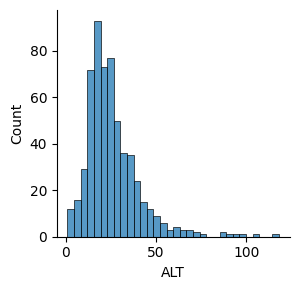

In [64]:
sns.FacetGrid(df).map(sns.histplot, "ALT").add_legend()
plt.show()


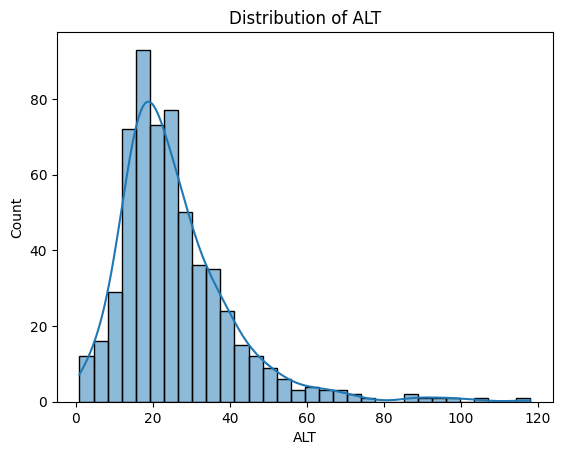

In [65]:
sns.histplot(df['ALT'], kde=True)
plt.title('Distribution of ALT')
plt.show()

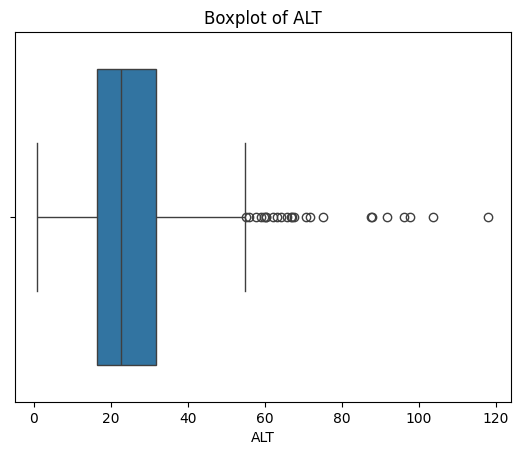

In [66]:
sns.boxplot(x="ALT", data=df)
plt.title('Boxplot of ALT')
plt.show()

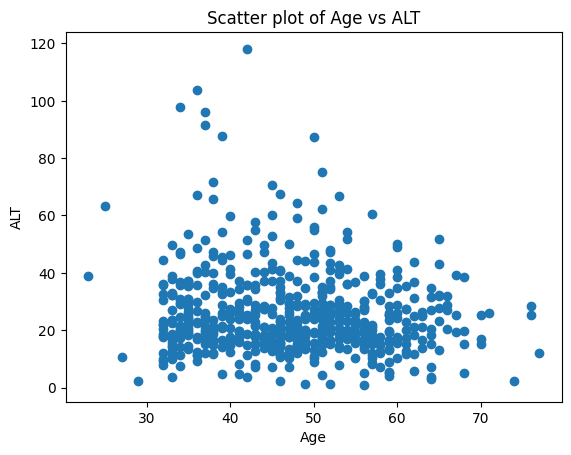

In [67]:
plt.scatter(df["Age"], df["ALT"])
plt.title('Scatter plot of Age vs ALT')
plt.xlabel('Age')
plt.ylabel('ALT')
plt.show()

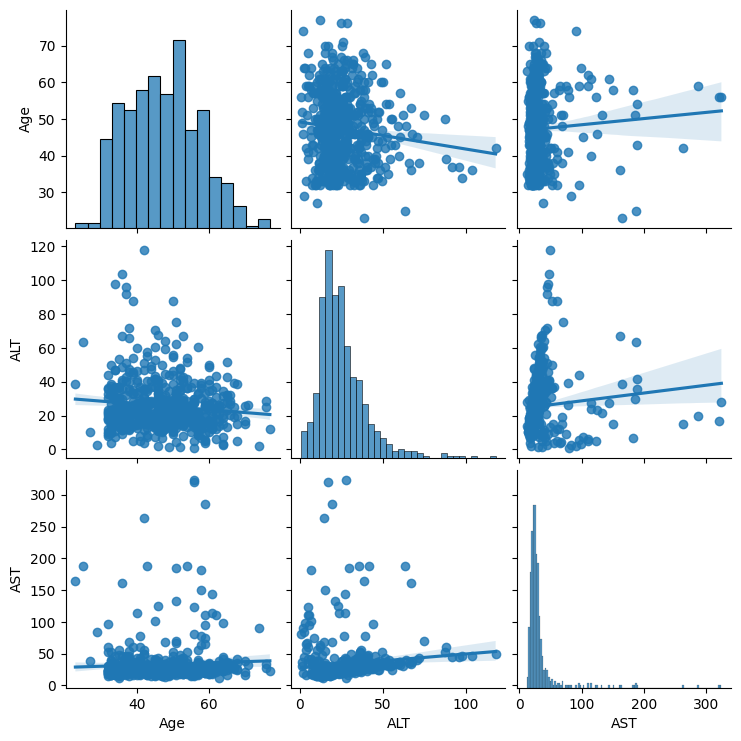

In [68]:
sns.pairplot(df, vars=['Age', 'ALT', 'AST'], kind="reg")
plt.show()

In [69]:
import numpy as np
corr = stats.pearsonr(df["Age"], df["ALT"])
print("p-value:\t", corr[1])
print("Correlation coefficient:\t", corr[0])

p-value:	 0.006990141316470994
Correlation coefficient:	 -0.11169731901342476


            Unnamed: 0  Category       Age       ALB       ALP       ALT  \
Unnamed: 0    1.000000  0.500861  0.436535 -0.290310 -0.007405 -0.370303   
Category      0.500861  1.000000  0.111378 -0.309728  0.061340 -0.260999   
Age           0.436535  0.111378  1.000000 -0.161481  0.170215 -0.111697   
ALB          -0.290310 -0.309728 -0.161481  1.000000 -0.103431  0.200235   
ALP          -0.007405  0.061340  0.170215 -0.103431  1.000000  0.078155   
ALT          -0.370303 -0.260999 -0.111697  0.200235  0.078155  1.000000   
AST           0.294364  0.646730  0.055230 -0.161389  0.027222  0.100191   
BIL           0.184770  0.548541  0.043339 -0.194822  0.066974 -0.126918   
CHE          -0.283010 -0.380191 -0.081921  0.364617  0.043800  0.311920   
CHOL         -0.045532 -0.292094  0.146815  0.167053  0.135502  0.184870   
CREA         -0.013836  0.244303 -0.014499 -0.018850  0.167393 -0.024710   
GGT           0.201029  0.459105  0.129556 -0.073379  0.428599  0.102898   
PROT        

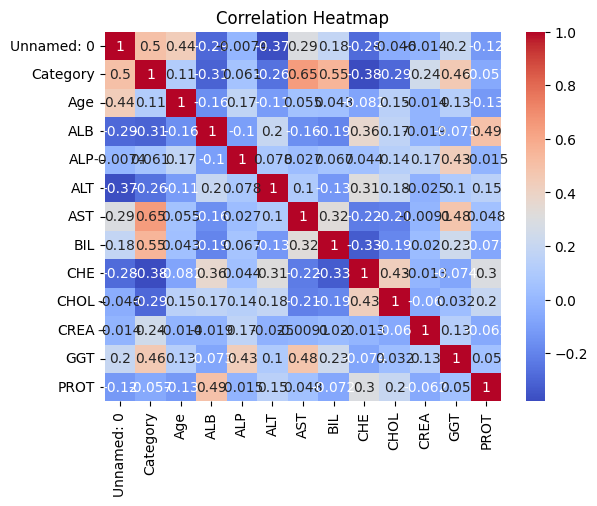

In [70]:

df_numeric = df.select_dtypes(include=[np.number])
correlation = df_numeric.corr(method='pearson')
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


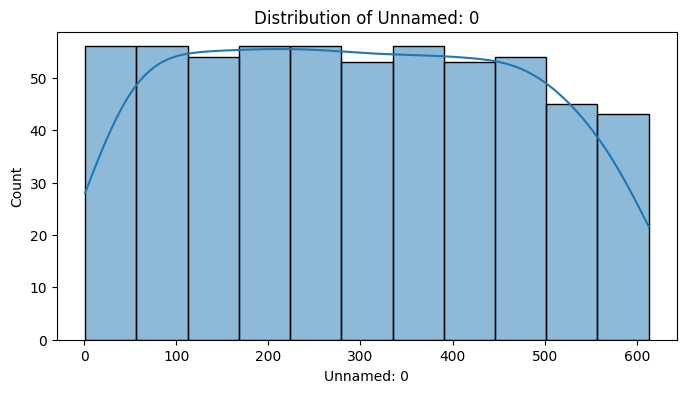

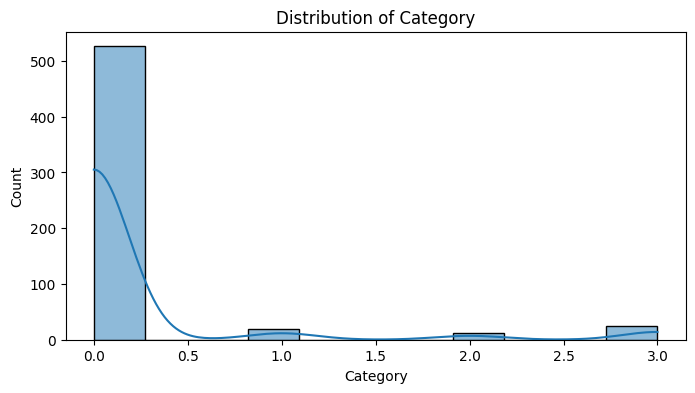

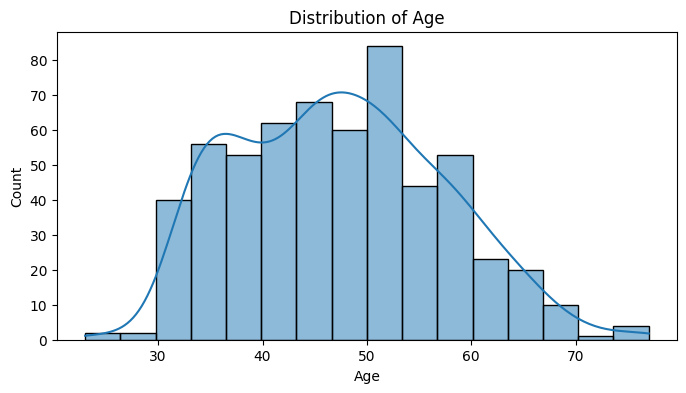

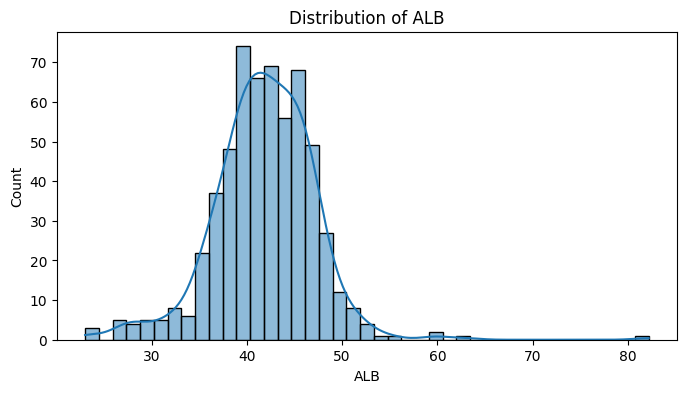

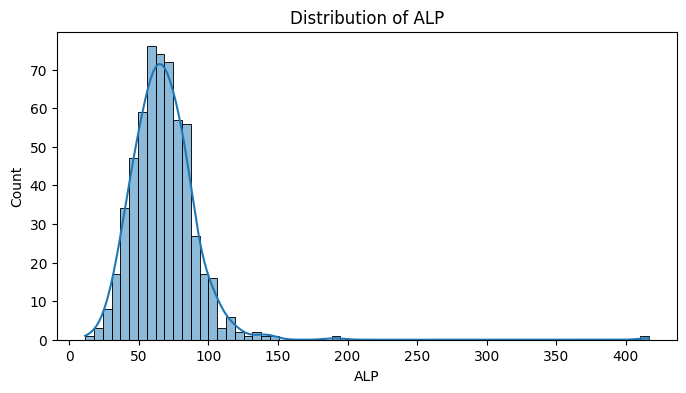

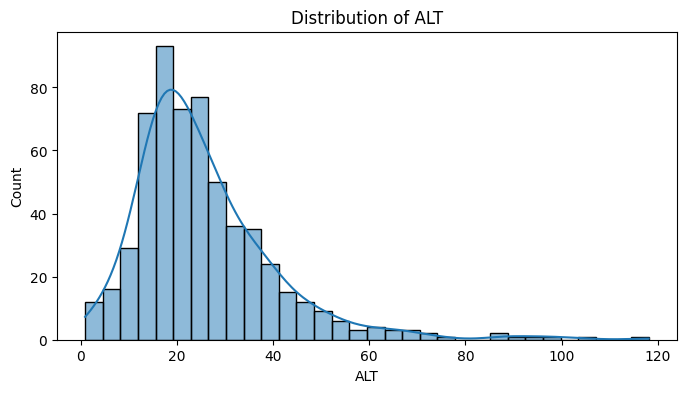

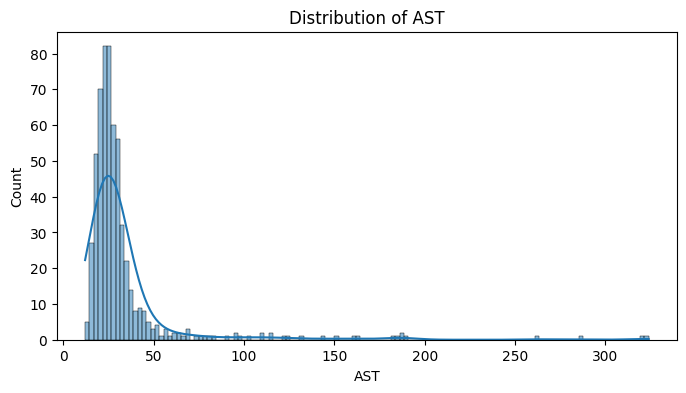

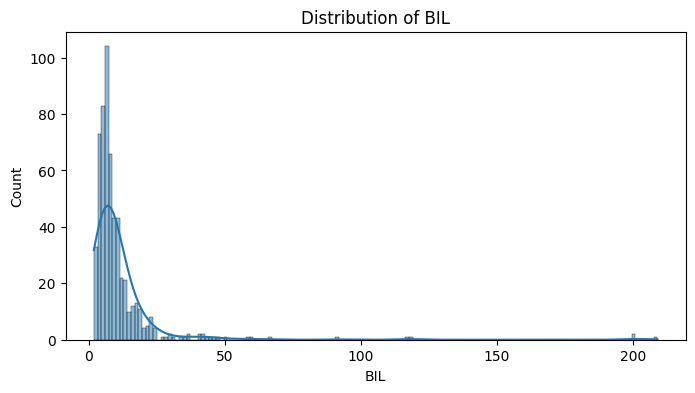

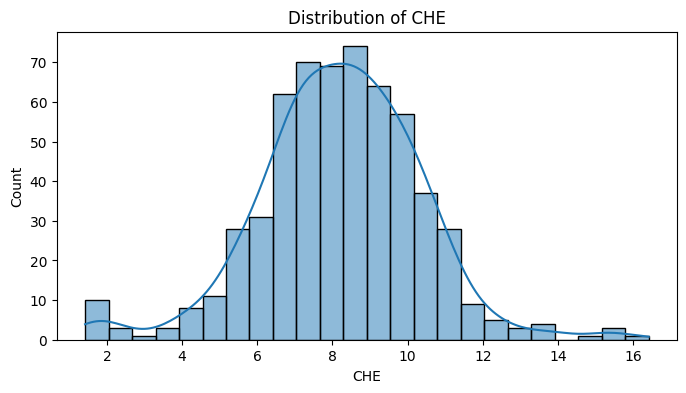

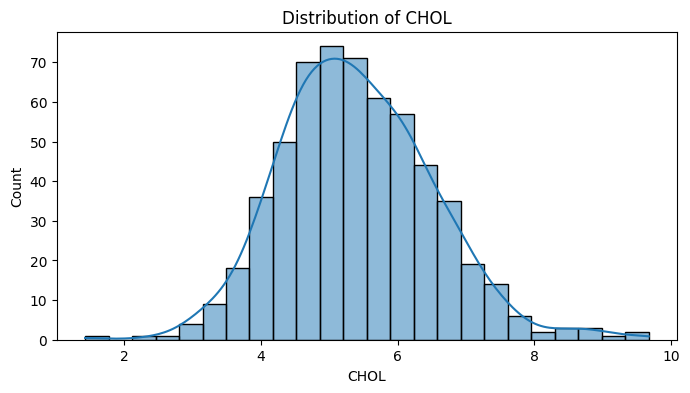

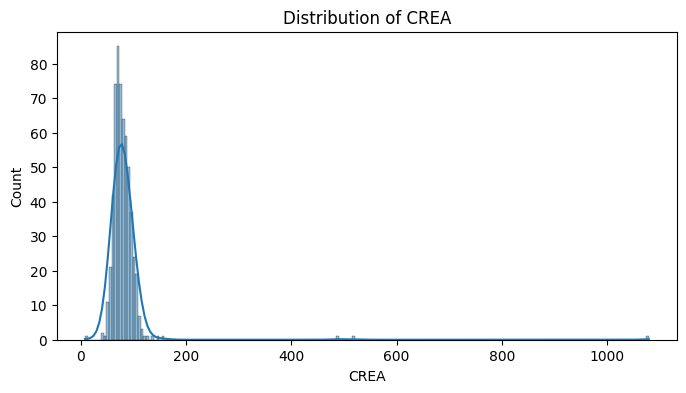

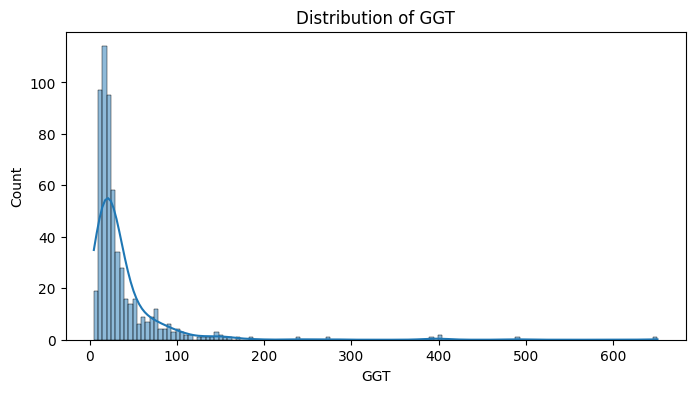

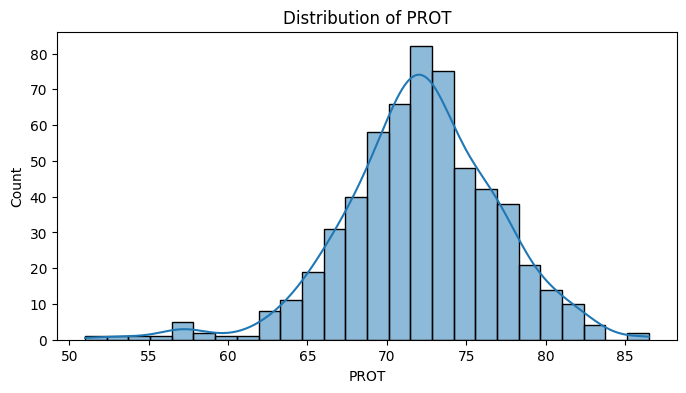

In [71]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [72]:
#Contigency Table
contingency_table = pd.crosstab(df['Category'], df['Sex'])
print(contingency_table)

Sex         f    m
Category          
0.0       209  317
1.0         4   16
2.0         4    8
3.0         8   16


In [73]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 3.6231350821697497, p-value: 0.30513954787521314


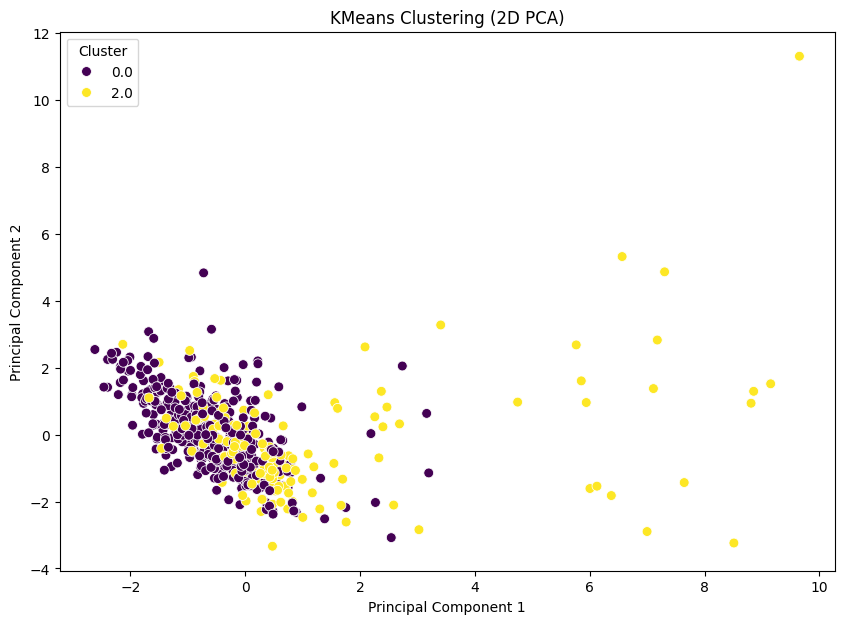

In [74]:
#Clustering and PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

#KMeans
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)
#PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']
#Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=50)
plt.title('KMeans Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



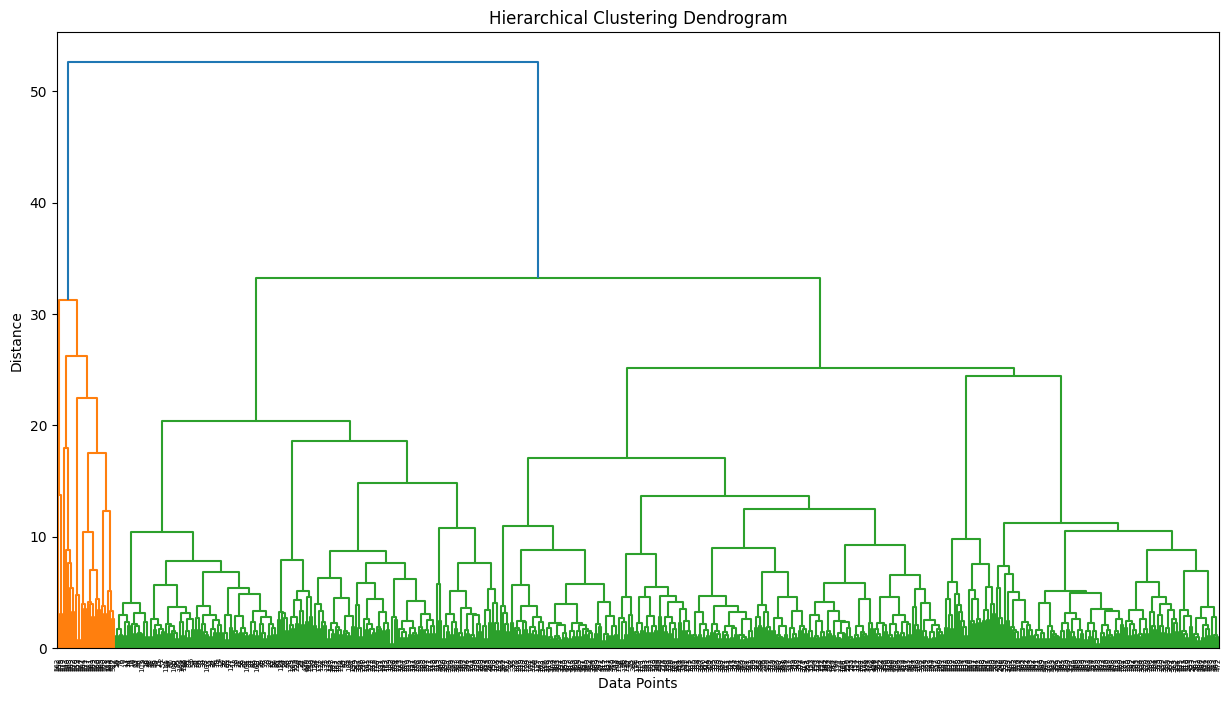

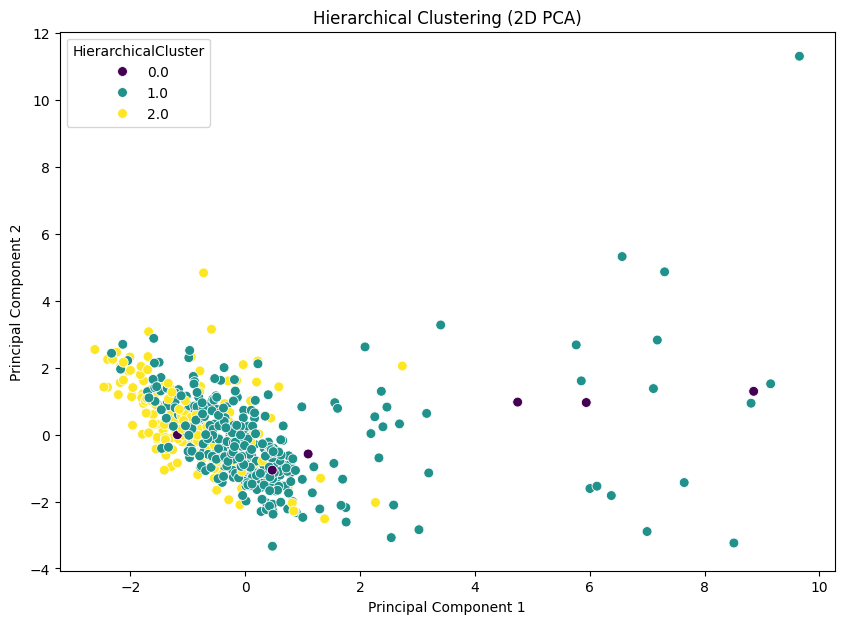

In [75]:
#Hierarchichal Clustering
linkage_matrix = linkage(data_scaled, method='ward')  #

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Specify the desired number of clusters
df['HierarchicalCluster'] = agg_clustering.fit_predict(data_scaled)

# PCA for Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['HierarchicalCluster'] = df['HierarchicalCluster']

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='HierarchicalCluster', data=pca_df, palette='viridis', s=50)
plt.title('Hierarchical Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [47]:
#Linear Regression
data_cleaned = df.dropna(subset=['ALB', 'PROT'])

X = data_cleaned[['ALB', 'ALP', 'ALT', 'AST']]
y = data_cleaned['PROT']
from sklearn.model_selection import train_test_split
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Model
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 0.53380224  0.00150484 -0.0078523   0.0161113 ]
Intercept: 49.1064794620966


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using the model
y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")



R-squared: 0.30242849944212413
Mean Squared Error: 22.09616944442931


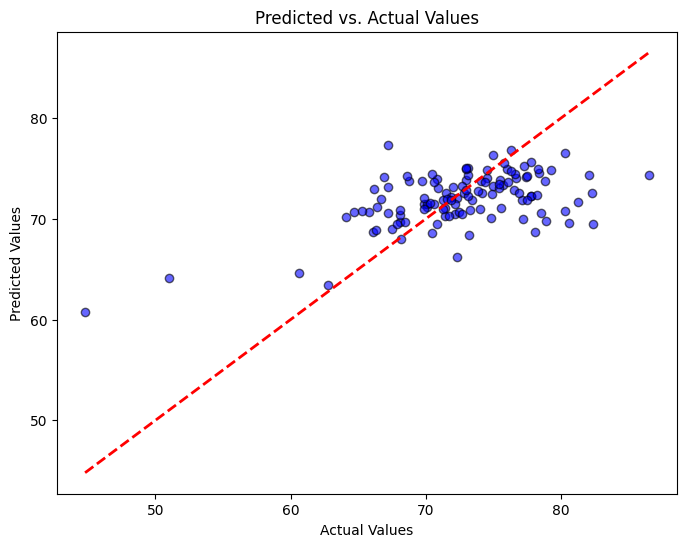

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()